<a href="https://colab.research.google.com/github/jyimz/Python/blob/main/PythonMath_TheoryProjects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv ('https://msis510-datasets-public-sdy.s3.us-west-2.amazonaws.com/vehicles.csv')

In [ ]:
df.shape

(426880, 26)

In [ ]:
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
5,7222379453,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1600,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
6,7221952215,https://hudsonvalley.craigslist.org/cto/d/west...,hudson valley,https://hudsonvalley.craigslist.org,1000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
7,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
8,7209064557,https://medford.craigslist.org/cto/d/grants-pa...,medford-ashland,https://medford.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,or,NaN,NaN,NaN
9,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN


In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
#check null values portion for each column (in % of total number of rows)
df.isna().mean()*100

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64

<ipython-input-85-cf946e7274b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationmatrix=df.corr()


<Axes: >

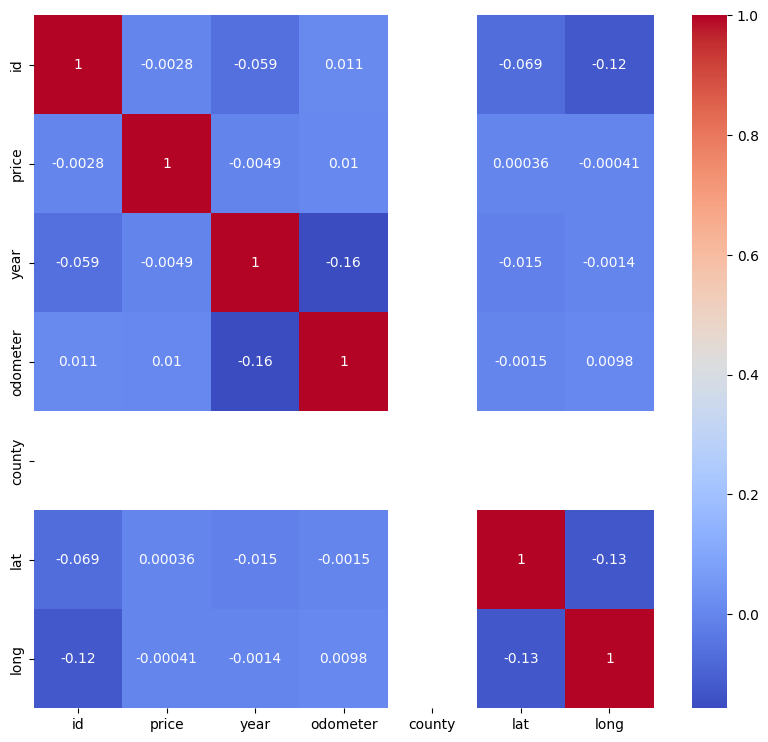

In [ ]:
correlationmatrix=df.corr()
plt.figure(figsize=(10,9))
sns.heatmap(correlationmatrix,annot=True, cmap='coolwarm')

In [ ]:
df=df.drop(columns=["id","url","region", "region_url","county", "size","VIN","image_url","description","lat","long"],axis=1)

In [ ]:
df.duplicated().sum()

524

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(426356, 15)

In [ ]:
df.isna().sum()

price                0
year              1192
manufacturer     17628
model             5264
condition       173999
cylinders       177523
fuel              3000
odometer          4386
title_status      8177
transmission      2543
drive           130456
type             92822
paint_color     130097
state                0
posting_date        55
dtype: int64

In [ ]:
#columns_to_check = ['odometer', 'transmission', 'title_status', 'fuel', 'manufacturer', 'model', 'year','lat','long','posting_date']
# checking the share of null values in these columns
#df[columns_to_check].isna().mean()

In [ ]:
# Dropping rows where any of these columns have null value
#df = df.dropna(subset=columns_to_check)
#df.shape

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(115703, 15)

In [ ]:
df.select_dtypes(include=['float64', 'int64']).columns

Index(['price', 'year', 'odometer'], dtype='object')

In [ ]:
df.select_dtypes(include=['object', 'category']).columns

Index(['manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state',
       'posting_date'],
      dtype='object')

In [ ]:
#categorical_cols = df.select_dtypes(include=['object', 'category']).columns
#for col in categorical_cols:
  #df[col] = df[col].fillna('missing')

In [ ]:
#numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
#for col in numerical_cols:
  #df[col].fillna(df[col].median(), inplace=True)
#Replacing lat long value with mean value is incorrect

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce').dt.year

In [ ]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True, errors='coerce')

In [ ]:
#calculate the original number of subcategories of each category
categorical_features = [
     'manufacturer', 'model', 'condition', 'cylinders',
    'fuel', 'title_status', 'transmission', 'drive', 'type',
    'paint_color', 'state'
]
for feature in categorical_features:
    num_subcategories = df[feature].nunique()
    print(f"The number of subcategories for {feature} is: {num_subcategories}")

The number of subcategories for manufacturer is: 41
The number of subcategories for model is: 11529
The number of subcategories for condition is: 6
The number of subcategories for cylinders is: 8
The number of subcategories for fuel is: 5
The number of subcategories for title_status is: 6
The number of subcategories for transmission is: 3
The number of subcategories for drive is: 3
The number of subcategories for type is: 13
The number of subcategories for paint_color is: 12
The number of subcategories for state is: 51


In [ ]:
df['manufacturer'].value_counts().head(20)

ford             20679
chevrolet        17734
toyota           10074
honda             6646
nissan            6179
jeep              5749
gmc               4866
dodge             4234
ram               4151
bmw               3224
mercedes-benz     2918
subaru            2728
hyundai           2601
volkswagen        2324
lexus             2202
kia               2031
chrysler          2002
cadillac          1703
buick             1555
infiniti          1467
Name: manufacturer, dtype: int64

In [ ]:
df['model'].value_counts().head(500)

f-150                    1857
silverado 1500           1633
1500                     1033
camry                     915
accord                    848
                         ... 
4runner trd pro            40
qx80 sport utility 4d      40
fit sport                  40
a5                         40
yukon slt                  40
Name: model, Length: 500, dtype: int64

In [ ]:
# select the large number catogories to clean ( manufactuerer, model)
#top_manufacturers = df['manufacturer'].value_counts().index
#df['manufacturer'] = df['manufacturer'].apply(lambda x: x if x in top_manufacturers else 'others')

top_models = df['model'].value_counts().head(500).index
df['model'] = df['model'].apply(lambda x: x if x in top_models else 'others')

In [ ]:
# After processing the DataFrame as per the previous steps
#for feature in categorical_features:
    #num_subcategories = df[feature].nunique()
    #print(f"The number of subcategories for {feature} is: {num_subcategories}")

In [ ]:
price_percentile25 = df['price'].quantile(0.25)
price_percentile75 = df['price'].quantile(0.75)
price_iqr = price_percentile75 - price_percentile25
price_upper_limit = price_percentile75 + 1.5 * price_iqr
price_lower_limit = df['price'].quantile(0.15)
df = df[(df['price'] < price_upper_limit) & (df['price'] > price_lower_limit)]

In [ ]:
odometer_percentile75 = df['odometer'].quantile(0.75)
odometer_percentile25 = df['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = df['odometer'].quantile(0.05)

In [ ]:
df = df[(df['odometer'] < odometer_upper_limit) & (df['odometer'] > odometer_lower_limit)]

In [ ]:
df.shape

(90343, 15)

In [ ]:
# First, we'll calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price'.
#Q1 = df['price'].quantile(0.25)
#Q3 = df['price'].quantile(0.75)
#IQR = Q3 - Q1

# Define outliers as any values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
#df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [ ]:
#odometer_percentile75 = df['odometer'].quantile(0.75)
#odometer_percentile25 = df['odometer'].quantile(0.25)
#odometer_iqr = odometer_percentile75 - odometer_percentile25
#odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
#odometer_lower_limit = df['odometer'].quantile(0.05)

In [ ]:
df = df[(df['year'] >= 2013) & (df['year'] <= 2023)]
df = df[df['price'] >= 0]

In [ ]:
df['odometer'] = df['odometer'].astype(int)
df['year'] = df['year'].astype(int)

In [ ]:
df['car_age'] = df['posting_date'].dt.year - df['year']

#df['posting_date'].dt.year  -- Add posted
#df['year'] -- Car Manufacturing year
#df['car_age'] -- New variable created

df.drop(['year'], axis = 1, inplace = True)
df.drop(['posting_date'], axis = 1, inplace = True)

<ipython-input-109-ff4e352a76c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationmatrix=df.corr()


<Axes: >

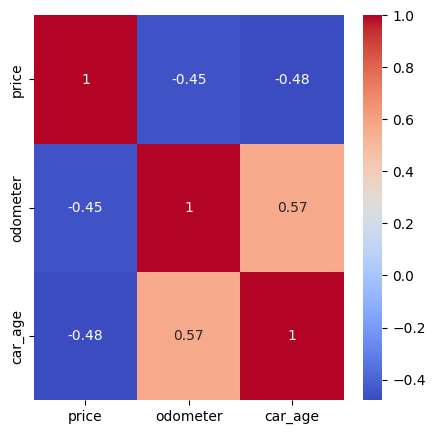

In [ ]:
correlationmatrix=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlationmatrix,annot=True, cmap='coolwarm')

In [ ]:
#CLeaned Data
df.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_age
31,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,al,8
33,34590,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499,clean,other,4wd,pickup,silver,al,5
34,35000,toyota,tacoma,excellent,6 cylinders,gas,43000,clean,automatic,4wd,truck,grey,al,2
35,29990,chevrolet,colorado extended cab,good,6 cylinders,gas,17302,clean,other,4wd,pickup,red,al,5
38,32990,jeep,wrangler unlimited sport,good,6 cylinders,gas,30041,clean,other,4wd,other,silver,al,4


In [ ]:
df.shape

(41355, 14)

In [ ]:
#calculate the original number of subcategories of each category
categorical_features = [
     'manufacturer', 'model', 'condition', 'cylinders',
    'fuel', 'title_status', 'transmission', 'drive', 'type',
    'paint_color', 'state'
]
for feature in categorical_features:
    num_subcategories = df[feature].nunique()
    print(f"The number of subcategories for {feature} is: {num_subcategories}")

The number of subcategories for manufacturer is: 34
The number of subcategories for model is: 435
The number of subcategories for condition is: 6
The number of subcategories for cylinders is: 7
The number of subcategories for fuel is: 5
The number of subcategories for title_status is: 6
The number of subcategories for transmission is: 3
The number of subcategories for drive is: 3
The number of subcategories for type is: 13
The number of subcategories for paint_color is: 12
The number of subcategories for state is: 51


In [ ]:
df.to_csv('vehicles_Cleaned2.csv', index=False)

In [ ]:
!mv vehicles_Cleaned2.csv /content/

mv: cannot stat 'vehicles_Cleaned2.csv': No such file or directory


In [ ]:
sample_data = df.sample(100)

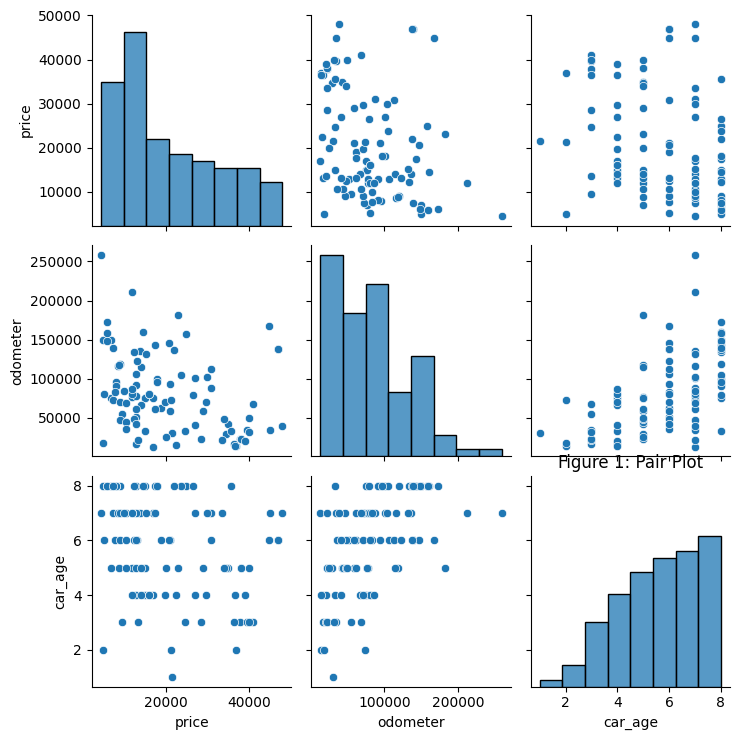

In [ ]:
sns.pairplot(sample_data)
plt.tight_layout()
plt.savefig('Insight-Pair-Plot',dpi=None)
plt.title('Figure 1: Pair Plot')
plt.show()

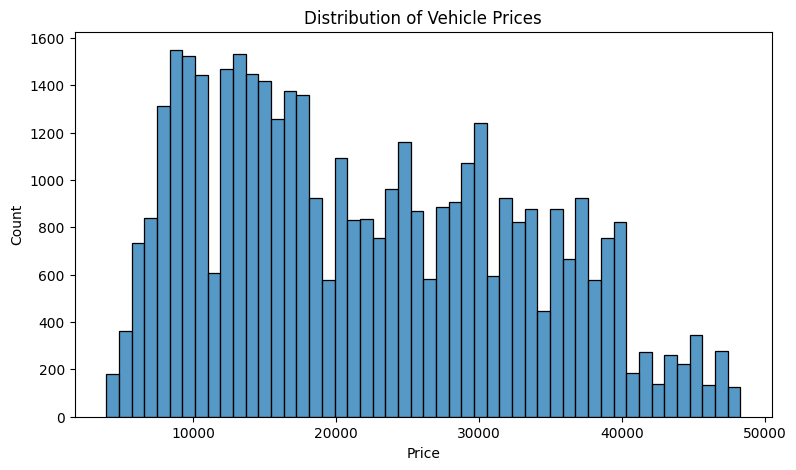

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(df['price'], kde=False, bins=50)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.show()

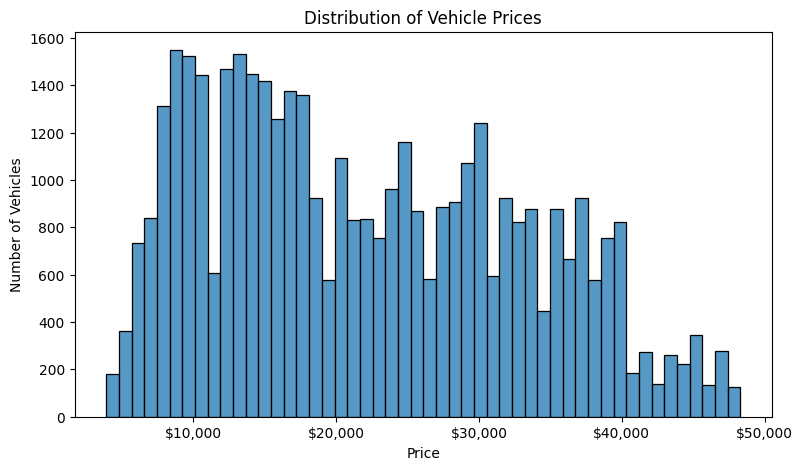

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming 'df' is your DataFrame

plt.figure(figsize=(9, 5))
sns.histplot(df['price'], kde=False, bins=50)

# Define a function to format y-axis tick labels with the currency symbol
def currency_formatter(x, pos):
    return f"${x:,.0f}"

# Apply the currency formatter to the y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.show()


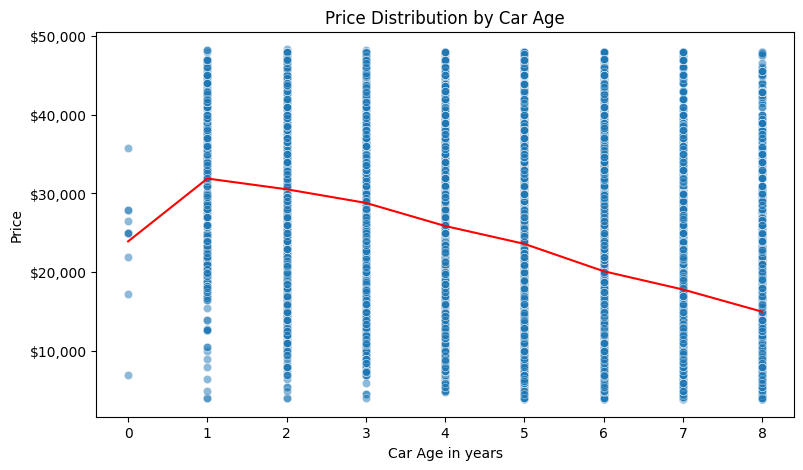

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Assuming 'df' is your DataFrame

plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='car_age', y='price', alpha=0.5)
sns.lineplot(data=df.groupby('car_age')['price'].mean().reset_index(), x='car_age', y='price', color='red')

# Define a function to format y-axis tick labels with the currency symbol
def currency_formatter(x, pos):
    return f"${x:,.0f}"

# Apply the currency formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))

plt.title('Price Distribution by Car Age')
plt.xlabel('Car Age in years')
plt.ylabel('Price')
plt.show()


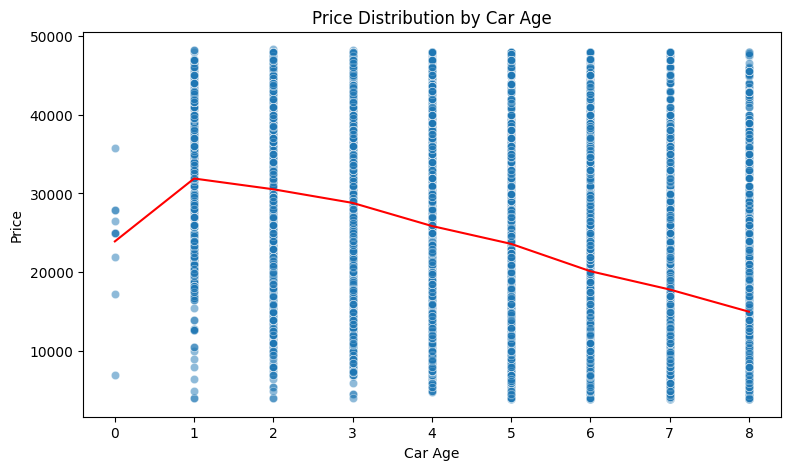

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='car_age', y='price', alpha=0.5)
sns.lineplot(data=df.groupby('car_age')['price'].mean().reset_index(), x='car_age', y='price', color='red')
plt.title('Price Distribution by Car Age')
plt.xlabel('Car Age in years')
plt.ylabel('Price')
plt.show()

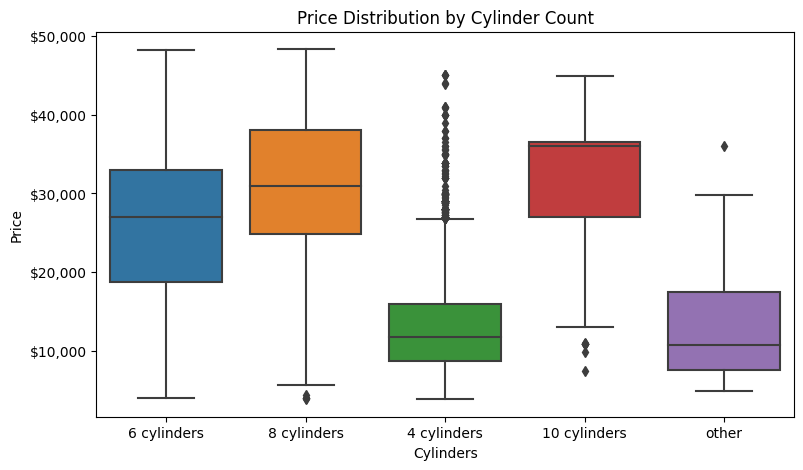

In [ ]:
common_cylinders = df['cylinders'].value_counts().head(5).index
filtered_by_cylinders = df[df['cylinders'].isin(common_cylinders)]
plt.figure(figsize=(9, 5))
sns.boxplot(data=filtered_by_cylinders, x='cylinders', y='price')
# Define a function to format y-axis tick labels with the currency symbol
def currency_formatter(x, pos):
    return f"${x:,.0f}"

# Apply the currency formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Price Distribution by Cylinder Count')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.show()

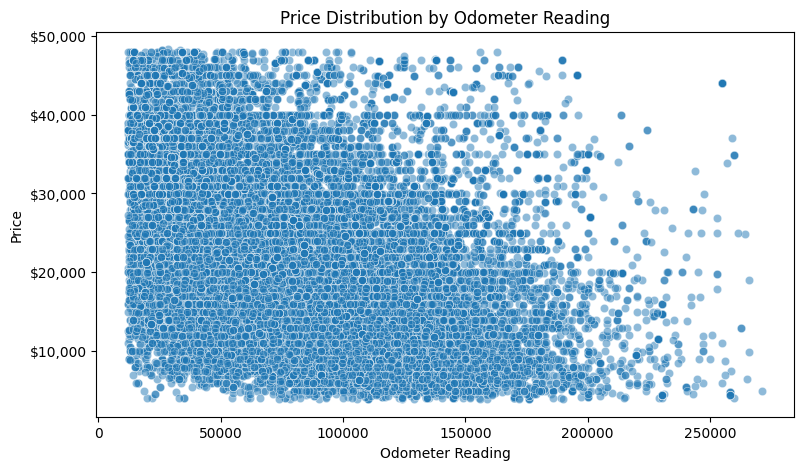

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.5)
def currency_formatter(x, pos):
    return f"${x:,.0f}"

# Apply the currency formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Price Distribution by Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')
plt.show()

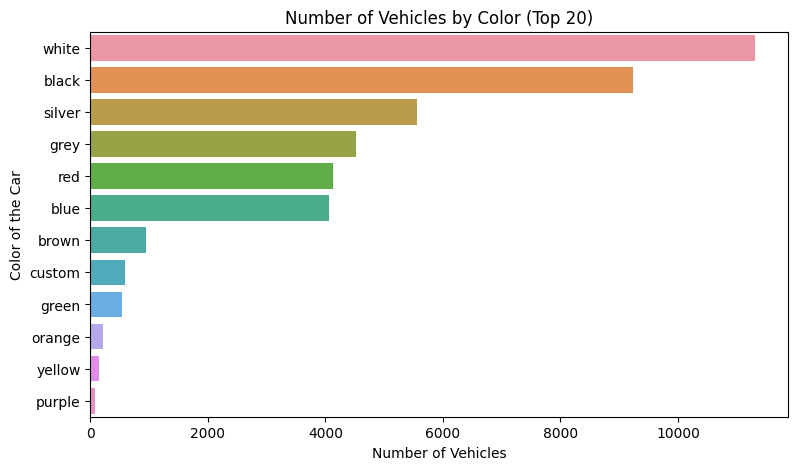

In [ ]:
# Vehicle color distribution
top_colors = df['paint_color'].value_counts().head(20).index
filtered_by_color = df[df['paint_color'].isin(top_colors)]
plt.figure(figsize=(9, 5))
sns.countplot(data=filtered_by_color, y='paint_color', order=top_colors)
plt.title('Number of Vehicles by Color (Top 20)')
plt.xlabel('Number of Vehicles')
plt.ylabel('Color of the Car')
plt.show()

In [ ]:
df.columns

Index(['price', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state', 'car_age'],
      dtype='object')

In [ ]:
# Vehicle color distribution
top_colors = df[''].value_counts().head(10).index
filtered_by_color = df[df['paint_color'].isin(top_colors)]
plt.figure(figsize=(9, 5))
sns.countplot(data=filtered_by_color, y='paint_color', order=top_colors)
plt.title('Count of Vehicles by Color (Top 10)')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

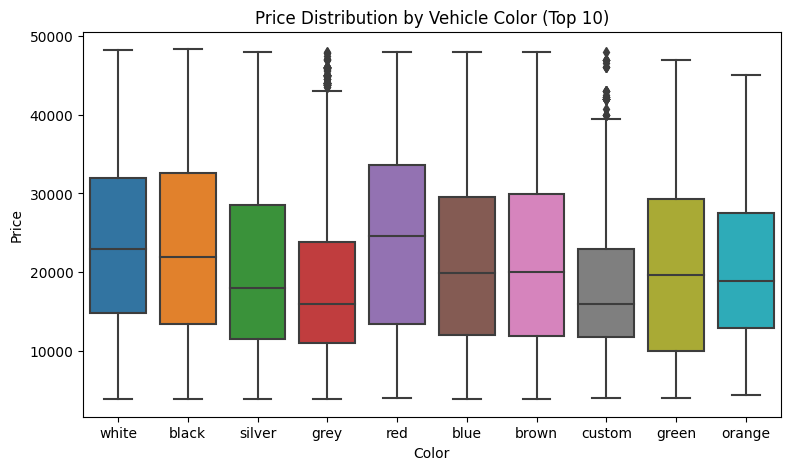

In [ ]:
#Vihicle colors and price
plt.figure(figsize=(9, 5))
sns.boxplot(data=filtered_by_color, x='paint_color', y='price', order=top_colors)
plt.title('Price Distribution by Vehicle Color (Top 10)')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

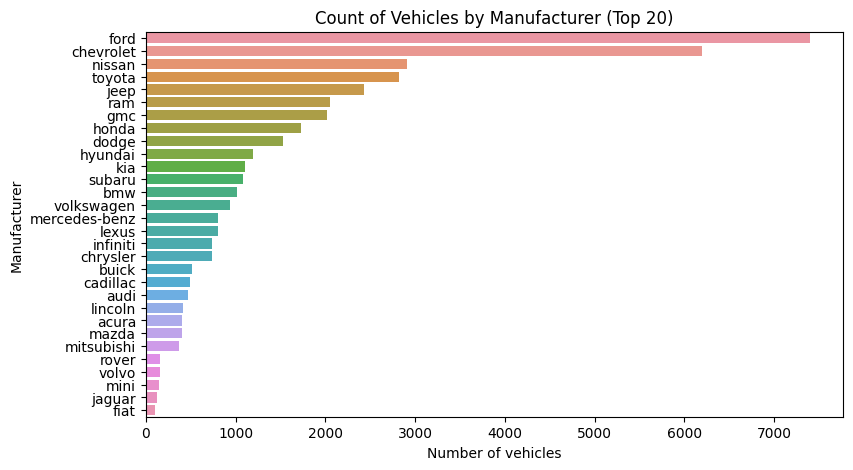

In [ ]:
count_by_manufacturer = df['manufacturer'].value_counts().reset_index()
count_by_manufacturer.columns = ['manufacturer', 'count']

# Count of Vehicles by Manufacturer (Top 20)
plt.figure(figsize=(9, 5))
sns.barplot(data=count_by_manufacturer.head(30), x='count', y='manufacturer')
plt.title('Count of Vehicles by Manufacturer (Top 20)')
plt.xlabel('Number of vehicles')
plt.ylabel('Manufacturer')
plt.show()

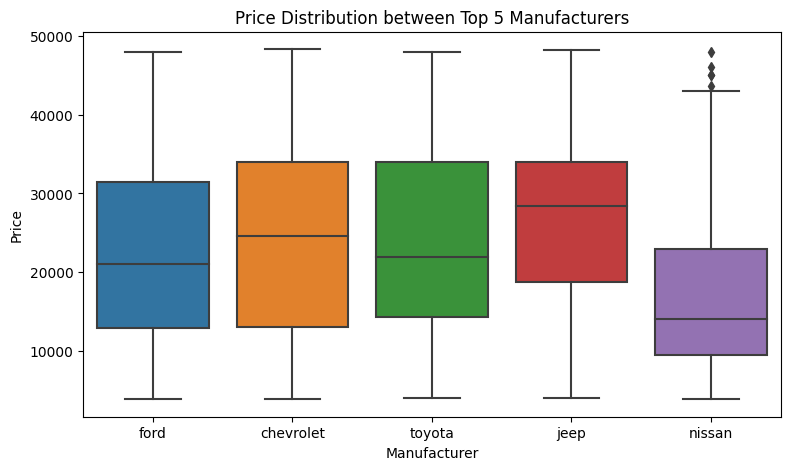

In [ ]:
# Preparing data for the next visualization: Price Distribution between Top 5 Manufacturers
top_manufacturers_list = count_by_manufacturer.head(5)['manufacturer'].tolist()
df = df[df['manufacturer'].isin(top_manufacturers_list)]

# Price Distribution between Top 5 Manufacturers
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='manufacturer', y='price')
plt.title('Price Distribution between Top 5 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

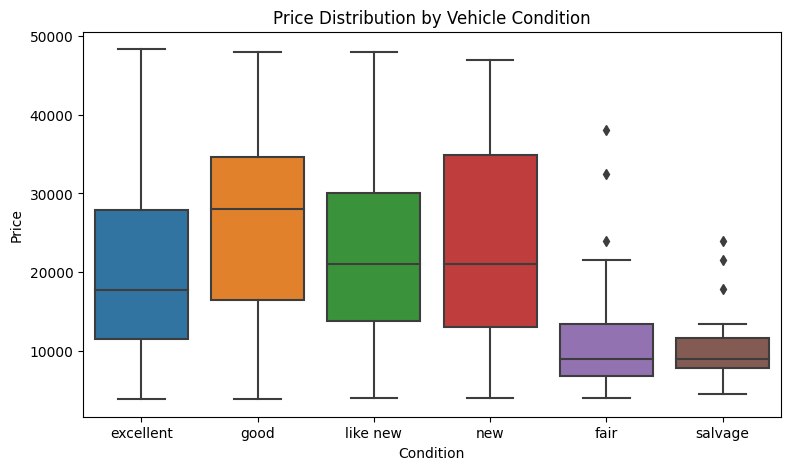

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='condition', y='price')
plt.title('Price Distribution by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

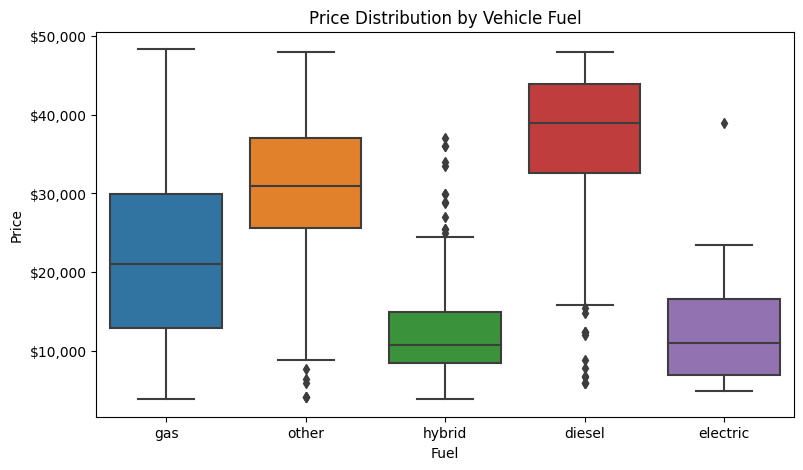

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='fuel', y='price')
def currency_formatter(x, pos):
    return f"${x:,.0f}"

# Apply the currency formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Price Distribution by Vehicle Fuel')
plt.xlabel('Fuel')
plt.ylabel('Price')
plt.show()

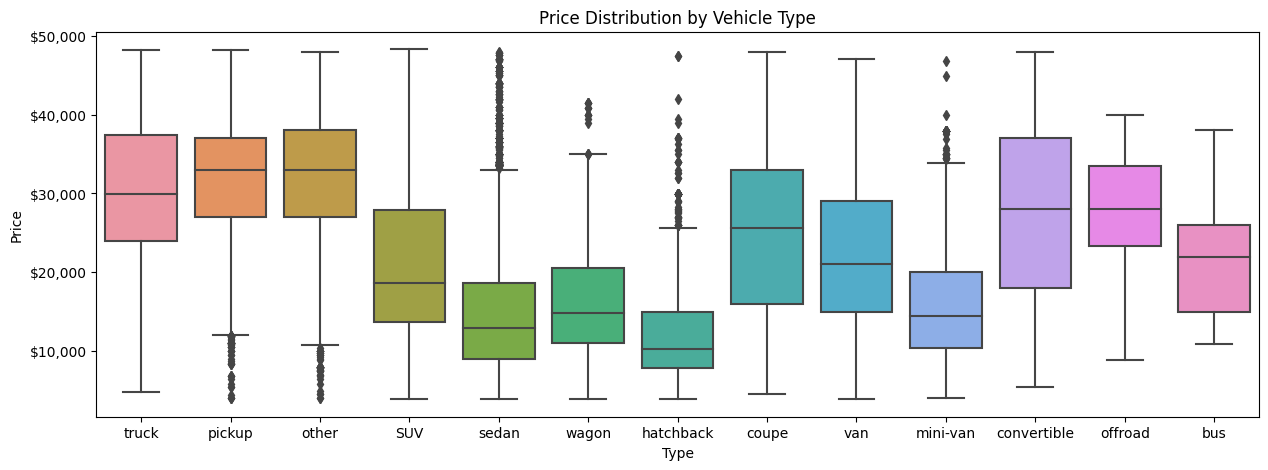

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='type', y='price')
def currency_formatter(x, pos):
    return f"${x:,.0f}"

# Apply the currency formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_formatter))
plt.title('Price Distribution by Vehicle Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

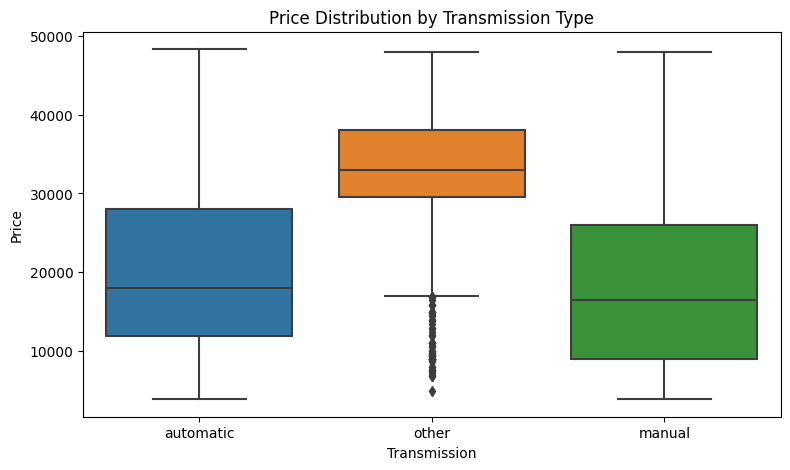

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

In [ ]:
df.describe()

,price,odometer,car_age
count,21761.000000,21761.000000,21761.000000
mean,22807.152061,78520.839024,5.314048
std,11101.334155,46751.580341,1.956557
min,3900.000000,12124.000000,0.000000
25%,12995.000000,37509.000000,4.000000
50%,21995.000000,73000.000000,5.000000
75%,31590.000000,109397.000000,7.000000
max,48300.000000,266127.000000,8.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
formula = "price" + "~" + "+".join ([col for col in df.columns if col!="price"])
formula

'price~manufacturer+model+condition+cylinders+fuel+odometer+title_status+transmission+drive+type+paint_color+state+car_age'

In [ ]:
#X = df.drop (['price' ], axis = 1)

In [ ]:
#y = df ['price']
#y

31        15000
33        34590
34        35000
35        29990
38        32990
          ...  
426792    32999
426793    15999
426798    44990
426800    41990
426857    41990
Name: price, Length: 26251, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test= train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# R suqre without all models 0.750
linear_regression_model = smf.ols (formula, data =df_train)
# Fit the model
linear_regression_results = linear_regression_model.fit()
# Print the results
print (linear_regression_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     364.9
Date:                Fri, 01 Dec 2023   Prob (F-statistic):               0.00
Time:                        04:43:58   Log-Likelihood:            -3.2139e+05
No. Observations:               33084   AIC:                         6.439e+05
Df Residuals:                   32518   BIC:                         6.487e+05
Df Model:                         565                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [ ]:
df.corr()['price']

<ipython-input-54-cbe57b8e6d9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price']


price       1.000000
odometer   -0.133649
lat         0.009168
long        0.051279
car_age    -0.373513
Name: price, dtype: float64